In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns

In [44]:
df = pd.read_csv("ml_project1_data.csv")

<AxesSubplot:>

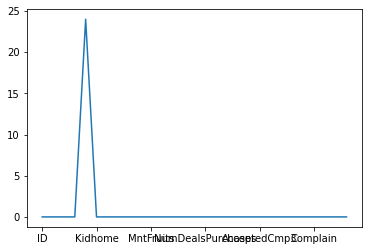

In [65]:
df.isna().sum().plot()

In [49]:
MNT_COLUMNS = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts']
NUM_COLUMNS = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [50]:
X = df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Response', 'Z_CostContact', 'Z_Revenue'], axis = 1)
y = df[['Response']]

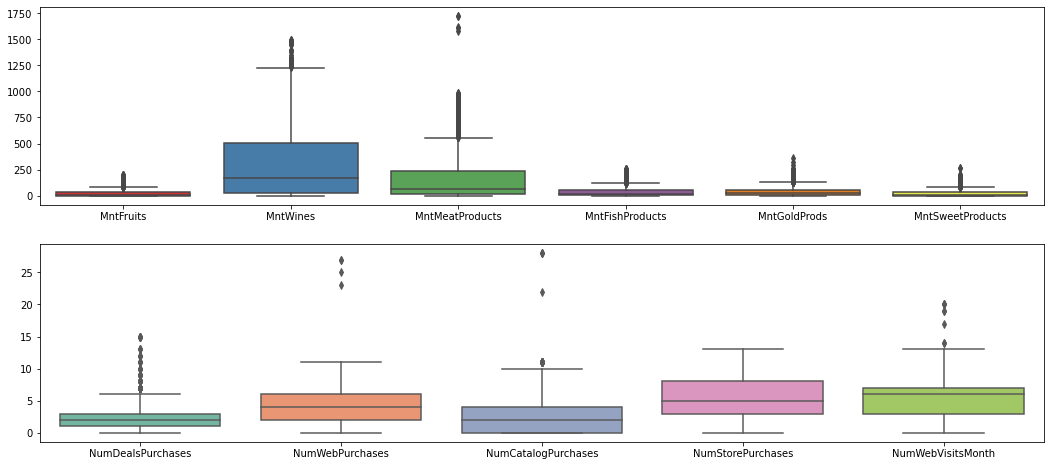

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
ax1 = sns.boxplot(data=X[MNT_COLUMNS], palette="Set1", ax=axes[0])
ax2 = sns.boxplot(data=X[NUM_COLUMNS], palette="Set2",ax=axes[1])

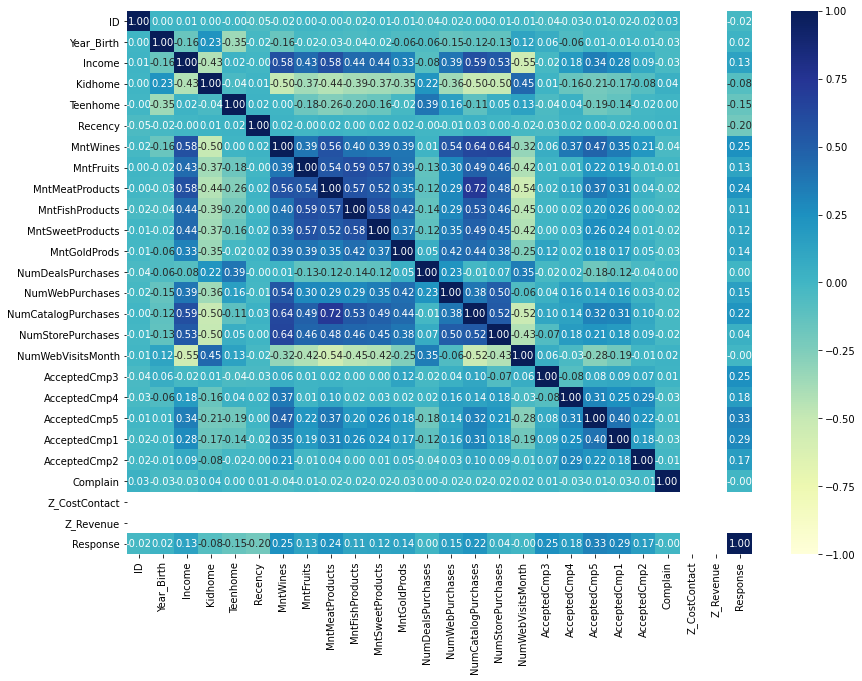

In [52]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);

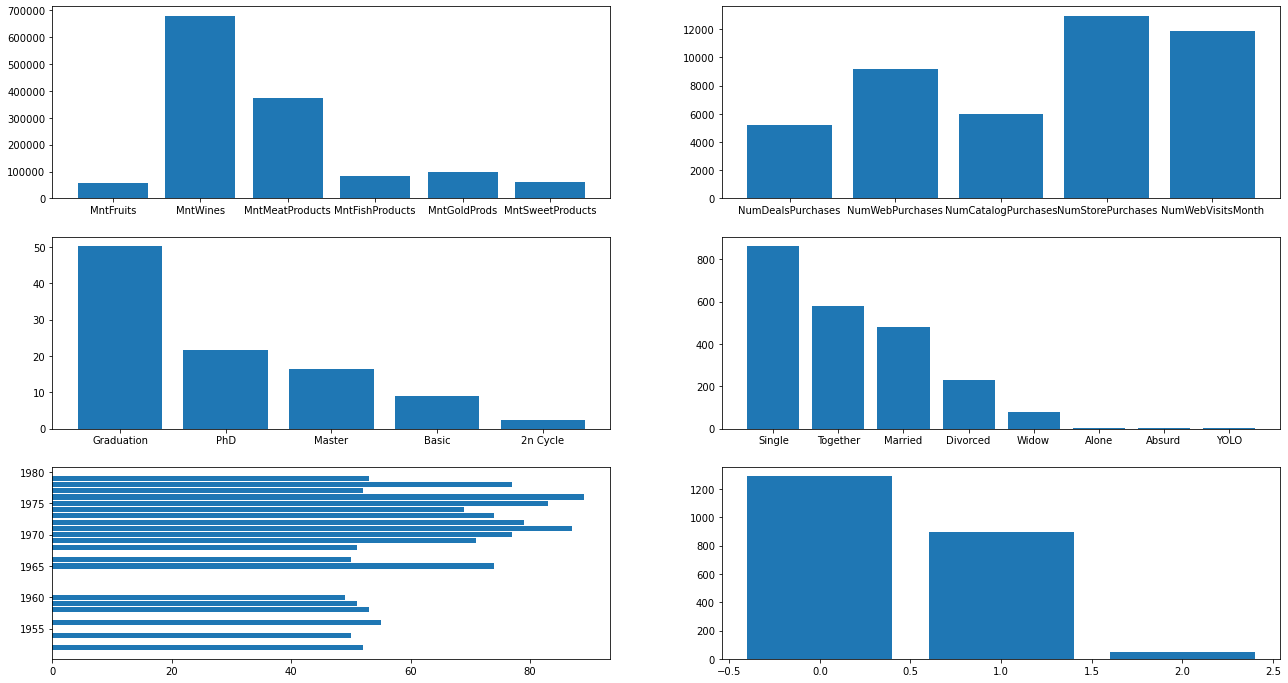

In [83]:
fig, axes = plt.subplots(3, 2, figsize=(22, 12))
ax1 = axes[0, 0].bar(df[MNT_COLUMNS].columns, df[MNT_COLUMNS].sum())
ax2 = axes[0, 1].bar(df[NUM_COLUMNS].columns, df[NUM_COLUMNS].sum())
ax3 = axes[1, 0].bar(df['Education'].unique(), df['Education'].value_counts(normalize=True)*100)
ax4 = axes[1, 1].bar(df['Marital_Status'].unique(), df['Marital_Status'].value_counts())
ax5 = axes[2, 0].barh(df['Year_Birth'].value_counts().sort_values(ascending = False).head(20).index, df['Year_Birth'].value_counts().sort_values(ascending = False).head(20))
ax4 = axes[2, 1].bar(df['Kidhome'].value_counts().index, df['Kidhome'].value_counts())

In [82]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
 

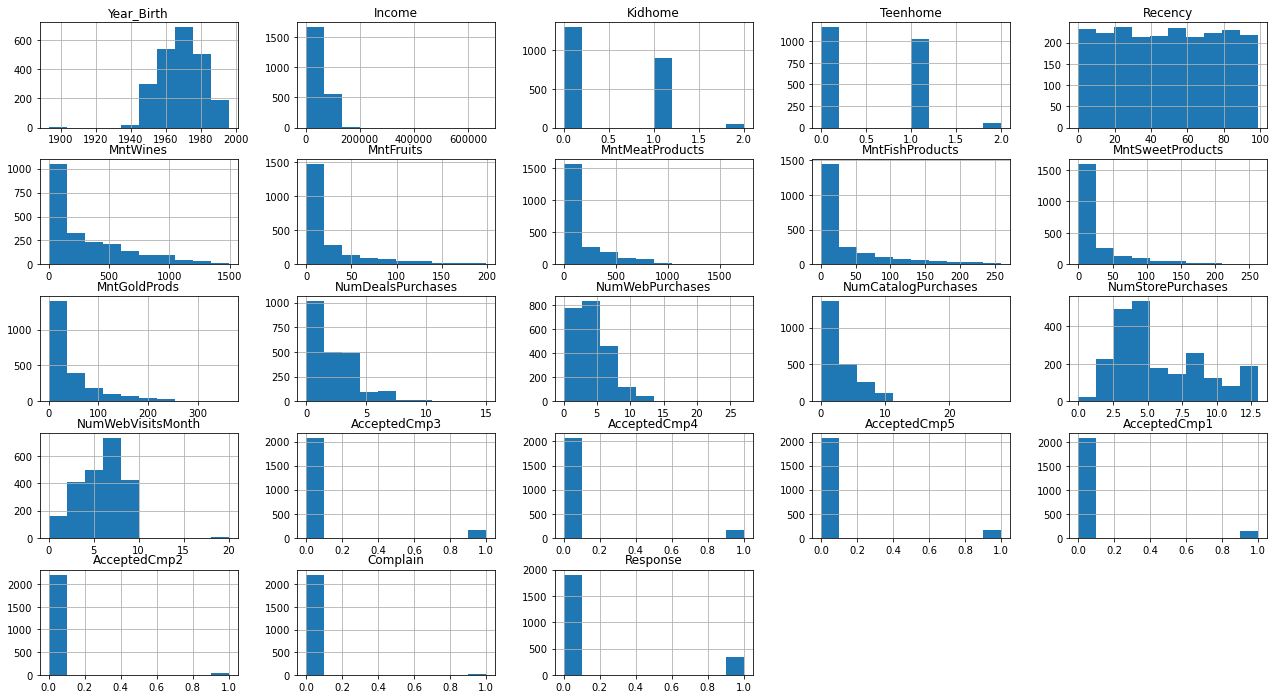

In [67]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1).hist(figsize=(22,12))

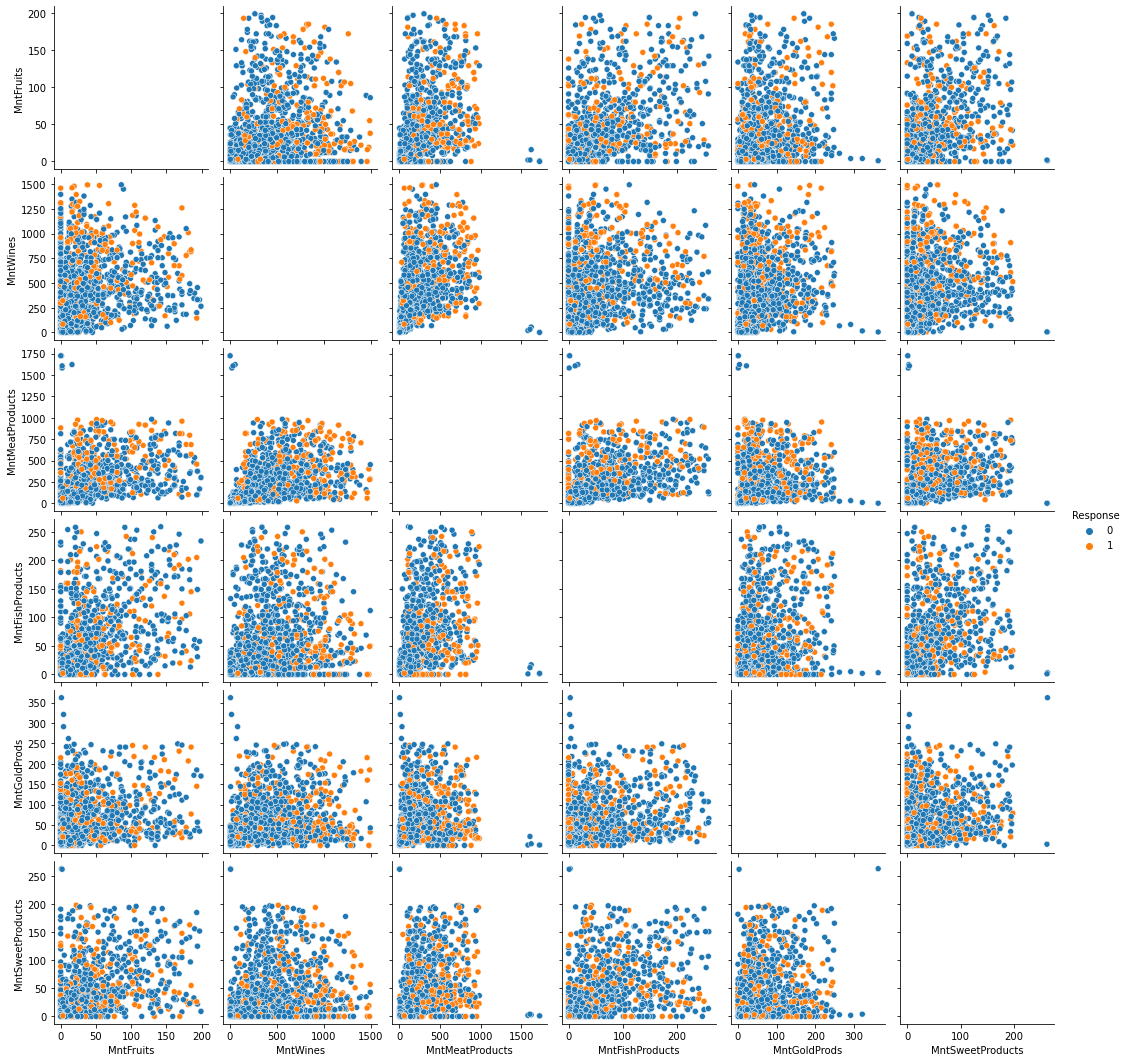

In [86]:
sns.pairplot(df, vars = MNT_COLUMNS, hue='Response', diag_kind = 'scatter')
plt.show()

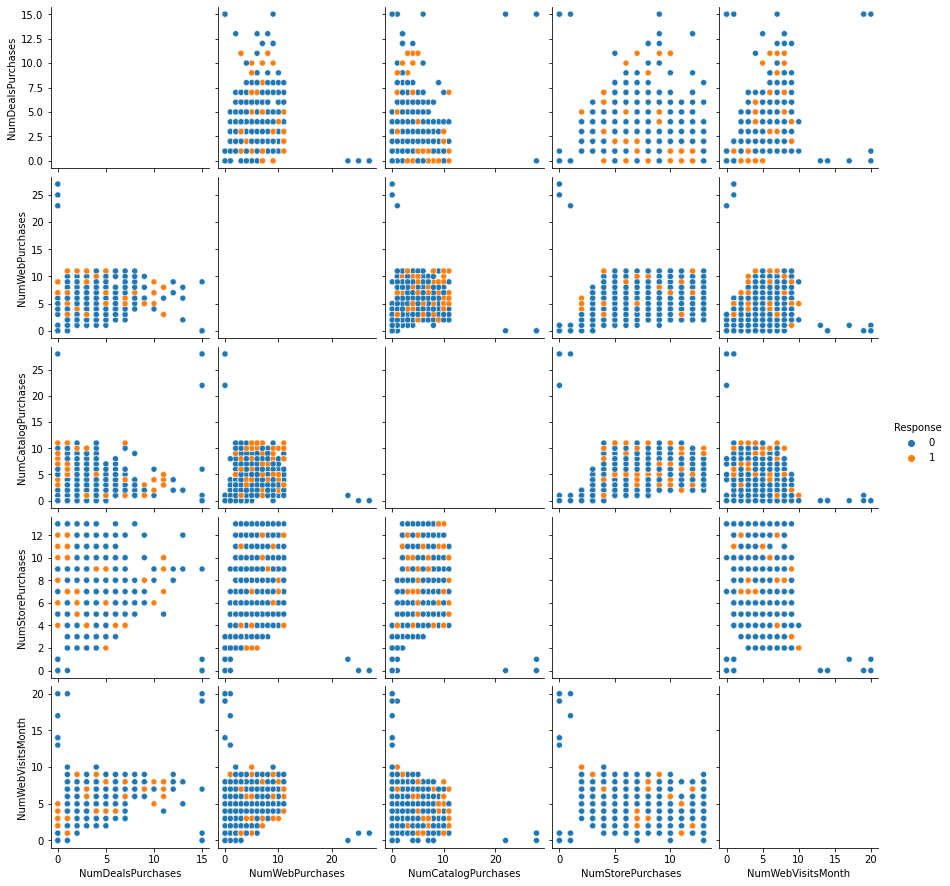

In [88]:
sns.pairplot(df, vars = NUM_COLUMNS, hue='Response', diag_kind = 'scatter')
plt.show()

## DATA PREP

In [42]:
# df['Year_Birth'].sub(2022, axis = 0).abs()
pd.get_dummies(df['Education'])

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2235,0,0,1,0,0
2236,0,0,0,0,1
2237,0,0,1,0,0
2238,0,0,0,1,0


In [13]:
df['Complain']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2240, dtype: int64

In [14]:
df.groupby(['Education']).sum()['MntFruits']

Education
2n Cycle       5878
Basic           600
Graduation    34683
Master         8012
PhD            9744
Name: MntFruits, dtype: int64

In [ ]:
df2 = df.copy().dropna()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
y_test.value_counts()

Response
0           636
1           104
dtype: int64

In [29]:
encoder = LabelEncoder()
df2['Education'] = encoder.fit_transform(df2['Education'])
df2['Marital_Status'] = encoder.fit_transform(df2['Marital_Status'])
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,5,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [36]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

ValueError: could not convert string to float: 'Graduation'

In [26]:
y_pred = clf.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
clf.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(X.columns[5, np.sort(clf.feature_importances_))

In [ ]:
X.columns

In [ ]:
metrics.plot_confusion_matrix(clf, X_test, y_test)